In [17]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX

from commons import DATA_PATH
from ts_modelling import backward_modelling

# Seasonal decomposition of biweekly data project 
- The BeanUtils case

In [72]:
# Obtain the data from the path
project_name = "httpcore"
data_path = os.path.join(DATA_PATH, "biweekly_data", f"{project_name}.csv")
data_df = pd.read_csv(data_path)
data_df.head()

,COMMIT_DATE,SQALE_INDEX,S1213,RedundantThrowsDeclarationCheck,S00117,S00122,S1488,S1905,UselessImportCheck,DuplicatedBlocks,S1226,S00112,S1155,S00108,S1151,S1132,S1481
0,2005-02-19 18:15:52,547.0,50.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1,2005-03-05 22:20:39,2033.0,48.0,0.0,0.0,6.0,0.0,0.0,1.0,3.0,0.0,2.0,2.0,3.0,0.0,2.0,4.0
2,2005-03-23 22:12:38,2816.0,48.0,0.0,0.0,6.0,0.0,0.0,1.0,5.0,0.0,5.0,2.0,3.0,0.0,5.0,7.0
3,2005-04-07 19:52:19,10225.0,70.0,7.0,0.0,9.0,0.0,2.0,2.0,13.0,5.0,23.0,2.0,5.0,3.0,7.0,32.0
4,2005-04-24 21:31:41,11502.0,69.0,7.0,0.0,9.0,0.0,2.0,3.0,18.0,5.0,23.0,2.0,5.0,3.0,7.0,32.0


In [56]:
# Due to design reasons in matplotlib, we need to set the global font size in for out purposes and then set them bat to the original numbers.
original_params = mpl.rcParams.copy()

# And then use:
#mpl.rcParams.update(original_params)

In [32]:
#plt.rcParams['axes.labelsize'] = 16  
#plt.rcParams['axes.titlesize'] = 16  
#plt.rcParams['xtick.labelsize'] = 14  
#plt.rcParams['ytick.labelsize'] = 14 

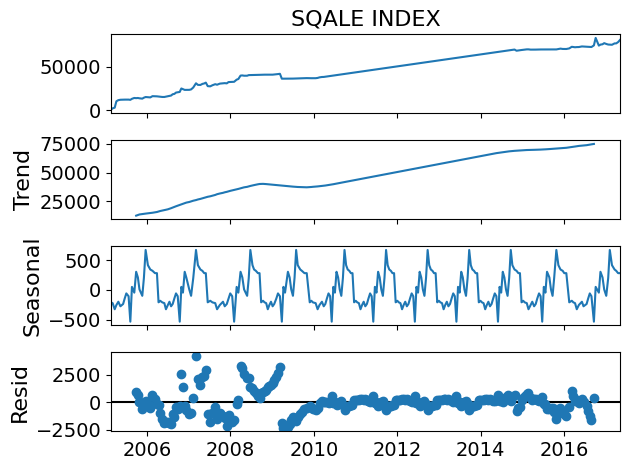

In [33]:
data_df.index = pd.to_datetime(data_df['COMMIT_DATE'])
sqale_index = data_df['SQALE_INDEX']
sqale_index.name = 'SQALE INDEX'
decomposition = sm.tsa.seasonal_decompose(sqale_index,
                                          model='additive',
                                          period=26)
decomposition.plot()
plt.savefig(os.path.join(DATA_PATH, "decomposition.pdf"))
plt.show()

# Providing model diagnostics for biweekly data case
- The httpcore case
- The introduced paramers are the best combination obtained from the described process in the article.

In [4]:
project_name = "httpcore"
periodicity = 'biweekly'
seasonality = 'true'
data_path = os.path.join(DATA_PATH, "biweekly_data", f"{project_name}.csv")
data_df = pd.read_csv(data_path)

In [61]:
project_name = "httpcore"
periodicity = 'biweekly'
seasonality = 'true'
data_path = os.path.join(DATA_PATH, "biweekly_data", f"{project_name}.csv")
data_df = pd.read_csv(data_path)

sqale_index = data_df.SQALE_INDEX.to_numpy()  # Dependent variable
split_point = round(len(sqale_index)*0.8)  # Initial data splitting. (80% training 20% testing)
training_df = data_df.iloc[:split_point, :]
testing_df = data_df.iloc[split_point:, :]

best_model_params, best_aic, best_regressors = backward_modelling(df=training_df, periodicity=periodicity,
                                                                  seasonality=seasonality)

##############################################################################
d: 0, D: 0
Best p, q combination: 2 0 - Seasonal: 1 1
d: 0, D: 0
['S1213', 'RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'S1488', 'S1905', 'UselessImportCheck', 'DuplicatedBlocks', 'S1226', 'S00112', 'S1155', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...
Number of remaining predictors: 14
['RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'S1488', 'S1905', 'UselessImportCheck', 'DuplicatedBlocks', 'S1226', 'S00112', 'S1155', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 13
['RedundantThrowsDeclarationCheck', 'S00117', 'S1488', 'S1905', 'UselessImportCheck', 'DuplicatedBlocks', 'S1226', 'S00112', 'S1155', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 12
['RedundantThrowsDeclarationCheck', 'S00117', 'S1488', 'S1905', 'UselessImportCheck', 'DuplicatedBlocks', 'S1226', 'S00112', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 11
['RedundantThrowsDeclarationCheck', 'S00117', 'S1488', 'S1905', 'UselessImportCheck', 'DuplicatedBlocks', 'S00112', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...


Error with configuration: (0, 0) - LU decomposition error.
##############################################################################
d: 1, D: 0
Best p, q combination: 0 0 - Seasonal: 0 0
d: 1, D: 0
['S1213', 'RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'S1488', 'S1905', 'UselessImportCheck', 'DuplicatedBlocks', 'S1226', 'S00112', 'S1155', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...
Number of remaining predictors: 14
['RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'S1488', 'S1905', 'UselessImportCheck', 'DuplicatedBlocks', 'S1226', 'S00112', 'S1155', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...
Number of remaining predictors: 13
['RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'S1488', 'S1905', 'UselessImportCheck', 'DuplicatedBlocks', 'S1226', 'S00112', 'S1155', 'S00108', 'S1151', 'S1132']
Fitting model...
Number of remaining predictors: 12
['RedundantThrowsDeclarationCheck', 'S00117', 'S1488', 'S1905', 'UselessImportCheck', 'DuplicatedB

Number of remaining predictors: 12
['S1213', 'RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'S1488', 'UselessImportCheck', 'DuplicatedBlocks', 'S1226', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...
Number of remaining predictors: 11
['RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'S1488', 'UselessImportCheck', 'DuplicatedBlocks', 'S1226', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...
Number of remaining predictors: 10
['RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'S1488', 'UselessImportCheck', 'DuplicatedBlocks', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 9
['RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'S1488', 'UselessImportCheck', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 8
['RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'S1488', 'UselessImportCheck', 'S00108', 'S1151', 'S1132']
Fitting model...
Number of remaining predictors: 7
['S00117', 'S00122', 'S1488', 'UselessImportCheck', 'S00108', 'S1151', 'S1132']
Fitting model...


Number of remaining predictors: 6
['S00122', 'S1488', 'UselessImportCheck', 'S00108', 'S1151', 'S1132']
Fitting model...


Number of remaining predictors: 5
['S00122', 'S1488', 'S00108', 'S1151', 'S1132']
Fitting model...


Error with configuration: (0, 1) - LU decomposition error.
##############################################################################
d: 1, D: 1
Best p, q combination: 0 0 - Seasonal: 2 0
d: 1, D: 1
['S1213', 'RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'S1488', 'S1905', 'UselessImportCheck', 'DuplicatedBlocks', 'S1226', 'S00112', 'S1155', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 14
['S1213', 'RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'S1488', 'S1905', 'UselessImportCheck', 'DuplicatedBlocks', 'S1226', 'S1155', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 13
['RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'S1488', 'S1905', 'UselessImportCheck', 'DuplicatedBlocks', 'S1226', 'S1155', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 12
['RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'S1488', 'S1905', 'UselessImportCheck', 'S1226', 'S1155', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 11
['RedundantThrowsDeclarationCheck', 'S00117', 'S1488', 'S1905', 'UselessImportCheck', 'S1226', 'S1155', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...
Number of remaining predictors: 10
['RedundantThrowsDeclarationCheck', 'S00117', 'S1488', 'S1905', 'UselessImportCheck', 'S1226', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...
Number of remaining predictors: 9
['RedundantThrowsDeclarationCheck', 'S00117', 'S1488', 'S1905', 'UselessImportCheck', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 8
['RedundantThrowsDeclarationCheck', 'S00117', 'S1488', 'UselessImportCheck', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 7
['RedundantThrowsDeclarationCheck', 'S1488', 'UselessImportCheck', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 6
['RedundantThrowsDeclarationCheck', 'S1488', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...
Number of remaining predictors: 5
['RedundantThrowsDeclarationCheck', 'S1488', 'S1151', 'S1132', 'S1481']
Fitting model...
Number of remaining predictors: 4
['RedundantThrowsDeclarationCheck', 'S1488', 'S1151', 'S1132']
Fitting model...
Number of remaining predictors: 3
['S1488', 'S1151', 'S1132']
Fitting model...
Number of remaining predictors: 2
['S1151', 'S1132']
Fitting model...
Number of remaining predictors: 1
['S1151']
Fitting model...
break
##############################################################################
d: 2, D: 1
Best p, q combination: 4 0 - Seasonal: 2 0
d: 2, D: 1
['S1213', 'RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'S1488', 'S1905', 'UselessImportCheck', 'DuplicatedBlocks', 'S1226', 'S00112', 'S1155', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...
Number of remaining predictors: 14
['RedundantThrowsDeclaration

Number of remaining predictors: 13
['S1213', 'RedundantThrowsDeclarationCheck', 'S00122', 'S1488', 'UselessImportCheck', 'DuplicatedBlocks', 'S1226', 'S00112', 'S1155', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 12
['S1213', 'RedundantThrowsDeclarationCheck', 'S00122', 'S1488', 'DuplicatedBlocks', 'S1226', 'S00112', 'S1155', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 11
['RedundantThrowsDeclarationCheck', 'S00122', 'S1488', 'DuplicatedBlocks', 'S1226', 'S00112', 'S1155', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 10
['RedundantThrowsDeclarationCheck', 'S00122', 'S1488', 'DuplicatedBlocks', 'S1226', 'S1155', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 9
['RedundantThrowsDeclarationCheck', 'S00122', 'S1488', 'DuplicatedBlocks', 'S1226', 'S1155', 'S1151', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 8
['RedundantThrowsDeclarationCheck', 'S00122', 'DuplicatedBlocks', 'S1226', 'S1155', 'S1151', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 7
['RedundantThrowsDeclarationCheck', 'S00122', 'DuplicatedBlocks', 'S1226', 'S1155', 'S1151', 'S1481']
Fitting model...


Number of remaining predictors: 6
['RedundantThrowsDeclarationCheck', 'S00122', 'DuplicatedBlocks', 'S1226', 'S1155', 'S1481']
Fitting model...
Number of remaining predictors: 5
['RedundantThrowsDeclarationCheck', 'S00122', 'DuplicatedBlocks', 'S1155', 'S1481']
Fitting model...
Number of remaining predictors: 4
['RedundantThrowsDeclarationCheck', 'S00122', 'DuplicatedBlocks', 'S1155']
Fitting model...
Number of remaining predictors: 3
['RedundantThrowsDeclarationCheck', 'S00122', 'DuplicatedBlocks']
Fitting model...
Number of remaining predictors: 2
['S00122', 'DuplicatedBlocks']
Fitting model...
Number of remaining predictors: 1
['DuplicatedBlocks']
Fitting model...
break
##############################################################################
d: 1, D: 2
Best p, q combination: 0 1 - Seasonal: 2 0
d: 1, D: 2
['S1213', 'RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'S1488', 'S1905', 'UselessImportCheck', 'DuplicatedBlocks', 'S1226', 'S00112', 'S1155', 'S00108', 'S1151', 'S

Number of remaining predictors: 11
['S1213', 'RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'S1488', 'UselessImportCheck', 'DuplicatedBlocks', 'S1226', 'S00112', 'S1132', 'S1481']
Fitting model...
Number of remaining predictors: 10
['S1213', 'RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'S1488', 'UselessImportCheck', 'DuplicatedBlocks', 'S1226', 'S1132', 'S1481']
Fitting model...
Number of remaining predictors: 9
['S1213', 'RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'S1488', 'DuplicatedBlocks', 'S1226', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 8
['S1213', 'RedundantThrowsDeclarationCheck', 'S00117', 'S1488', 'DuplicatedBlocks', 'S1226', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 7
['RedundantThrowsDeclarationCheck', 'S00117', 'S1488', 'DuplicatedBlocks', 'S1226', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 6
['RedundantThrowsDeclarationCheck', 'S00117', 'S1488', 'S1226', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 5
['RedundantThrowsDeclarationCheck', 'S00117', 'S1488', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 4
['RedundantThrowsDeclarationCheck', 'S00117', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 3
['S00117', 'S1132', 'S1481']
Fitting model...
Number of remaining predictors: 2
['S1132', 'S1481']
Fitting model...
Number of remaining predictors: 1
['S1132']
Fitting model...
break
##############################################################################
d: 2, D: 2
Best p, q combination: 4 0 - Seasonal: 2 0
d: 2, D: 2
['S1213', 'RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'S1488', 'S1905', 'UselessImportCheck', 'DuplicatedBlocks', 'S1226', 'S00112', 'S1155', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 14
['S1213', 'RedundantThrowsDeclarationCheck', 'S00117', 'S1488', 'S1905', 'UselessImportCheck', 'DuplicatedBlocks', 'S1226', 'S00112', 'S1155', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 13
['S1213', 'RedundantThrowsDeclarationCheck', 'S00117', 'S1488', 'S1905', 'UselessImportCheck', 'DuplicatedBlocks', 'S1226', 'S00112', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 12
['S1213', 'RedundantThrowsDeclarationCheck', 'S00117', 'S1488', 'S1905', 'UselessImportCheck', 'S1226', 'S00112', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 11
['S1213', 'RedundantThrowsDeclarationCheck', 'S00117', 'S1488', 'UselessImportCheck', 'S1226', 'S00112', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 10
['S1213', 'RedundantThrowsDeclarationCheck', 'S1488', 'UselessImportCheck', 'S1226', 'S00112', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...
Number of remaining predictors: 9
['RedundantThrowsDeclarationCheck', 'S1488', 'UselessImportCheck', 'S1226', 'S00112', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...
Number of remaining predictors: 8
['RedundantThrowsDeclarationCheck', 'S1488', 'S1226', 'S00112', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...
Number of remaining predictors: 7
['RedundantThrowsDeclarationCheck', 'S1488', 'S00112', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...
Number of remaining predictors: 6
['RedundantThrowsDeclarationCheck', 'S1488', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...
Number of remaining predictors: 5
['RedundantThrowsDeclarationCheck', 'S1488', 'S00108', 'S1151', 'S1132']
Fitting model...
Number of remaining predictors: 4
['S1488', 'S00108', 'S1151', 'S1132']
Fitting model...
N

Number of remaining predictors: 13
['S1213', 'RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'S1905', 'UselessImportCheck', 'DuplicatedBlocks', 'S1226', 'S00112', 'S1155', 'S00108', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 12
['S1213', 'RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'S1905', 'UselessImportCheck', 'DuplicatedBlocks', 'S1226', 'S00112', 'S00108', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 11
['S1213', 'RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'UselessImportCheck', 'DuplicatedBlocks', 'S1226', 'S00112', 'S00108', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 10
['S1213', 'RedundantThrowsDeclarationCheck', 'S00122', 'UselessImportCheck', 'DuplicatedBlocks', 'S1226', 'S00112', 'S00108', 'S1132', 'S1481']
Fitting model...
Number of remaining predictors: 9
['S1213', 'RedundantThrowsDeclarationCheck', 'S00122', 'DuplicatedBlocks', 'S1226', 'S00112', 'S00108', 'S1132', 'S1481']
Fitting model...
Number of remaining predictors: 8
['S1213', 'RedundantThrowsDeclarationCheck', 'S00122', 'DuplicatedBlocks', 'S00112', 'S00108', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 7
['S1213', 'RedundantThrowsDeclarationCheck', 'DuplicatedBlocks', 'S00112', 'S00108', 'S1132', 'S1481']
Fitting model...
Number of remaining predictors: 6
['S1213', 'RedundantThrowsDeclarationCheck', 'DuplicatedBlocks', 'S00108', 'S1132', 'S1481']
Fitting model...
Number of remaining predictors: 5
['RedundantThrowsDeclarationCheck', 'DuplicatedBlocks', 'S00108', 'S1132', 'S1481']
Fitting model...
Number of remaining predictors: 4
['RedundantThrowsDeclarationCheck', 'DuplicatedBlocks', 'S00108', 'S1481']
Fitting model...
Number of remaining predictors: 3
['RedundantThrowsDeclarationCheck', 'DuplicatedBlocks', 'S00108']
Fitting model...
Number of remaining predictors: 2
['DuplicatedBlocks', 'S00108']
Fitting model...
Number of remaining predictors: 1
['DuplicatedBlocks']
Fitting model...
break
##############################################################################
d: 0, D: 3
Best p, q combination: 1 1 - Seasonal: 2 0
d: 0, D: 3
['S1213', 'Redundant

Error with configuration: (0, 3) - LU decomposition error.
##############################################################################
d: 1, D: 3
Best p, q combination: 1 1 - Seasonal: 1 0
d: 1, D: 3
['S1213', 'RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'S1488', 'S1905', 'UselessImportCheck', 'DuplicatedBlocks', 'S1226', 'S00112', 'S1155', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 14
['S1213', 'RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'S1488', 'S1905', 'UselessImportCheck', 'S1226', 'S00112', 'S1155', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...


Error with configuration: (1, 3) - LU decomposition error.
##############################################################################
d: 2, D: 3
Best p, q combination: 2 2 - Seasonal: 2 1
d: 2, D: 3
['S1213', 'RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'S1488', 'S1905', 'UselessImportCheck', 'DuplicatedBlocks', 'S1226', 'S00112', 'S1155', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 14
['S1213', 'RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'S1488', 'S1905', 'UselessImportCheck', 'S1226', 'S00112', 'S1155', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...


Error with configuration: (2, 3) - LU decomposition error.
##############################################################################
d: 3, D: 3
Best p, q combination: 0 2 - Seasonal: 2 0
d: 3, D: 3
['S1213', 'RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'S1488', 'S1905', 'UselessImportCheck', 'DuplicatedBlocks', 'S1226', 'S00112', 'S1155', 'S00108', 'S1151', 'S1132', 'S1481']
Fitting model...


Number of remaining predictors: 14
['S1213', 'RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'S1488', 'S1905', 'UselessImportCheck', 'DuplicatedBlocks', 'S1226', 'S00112', 'S1155', 'S1151', 'S1132', 'S1481']
Fitting model...


Error with configuration: (3, 3) - LU decomposition error.
Best SARIMAX((1, 0, 0), (2, 1, 0, 26)) - AIC:24.0 with regressors ['RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'S1488', 'UselessImportCheck', 'S00108', 'S1151', 'S1132']


In [62]:
print(best_model_params, best_aic, best_regressors)

((1, 0, 0), (2, 1, 0, 26)) 24.0 ['RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'S1488', 'UselessImportCheck', 'S00108', 'S1151', 'S1132']


In [ ]:
# For the sake of not rerunning the previous function again, we store the obtained output
best_regressors = ['RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'S1488', 'UselessImportCheck', 'S00108', 'S1151', 'S1132']
best_aic = 24
best_model_params = ((1, 0, 0), (2, 1, 0, 26))

In [5]:
X_train = data_df[['RedundantThrowsDeclarationCheck', 'S00117', 'S00122', 'S1488', 'UselessImportCheck', 'S00108', 'S1151', 'S1132']].astype(float)
y_train = data_df['SQALE_INDEX'].astype(float)
X_train_scaled = X_train.map(np.log1p)

# Model fitting
model = SARIMAX(y_train.to_numpy(), exog=X_train_scaled.to_numpy(), order=(1, 0, 0),
                seasonal_order=(2, 1, 0, 26), enforce_stationarity=False, enforce_invertibility=False)
fitted_model = model.fit(disp=0, maxiter=1000)

In [64]:
print(fitted_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  284
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 26)   Log Likelihood               -1794.536
Date:                            Sat, 09 Mar 2024   AIC                           3613.072
Time:                                    11:53:01   BIC                           3652.948
Sample:                                         0   HQIC                          3629.201
                                            - 284                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          4598.3430   3344.963      1.375      0.169   -1957.664    1.12e+04
x2          3208.4248   1414.910   

In [53]:
plt.rcParams['axes.labelsize'] = 17  
plt.rcParams['axes.titlesize'] = 17  
plt.rcParams['xtick.labelsize'] = 17  
plt.rcParams['ytick.labelsize'] = 17 
plt.rcParams['legend.fontsize'] = 15

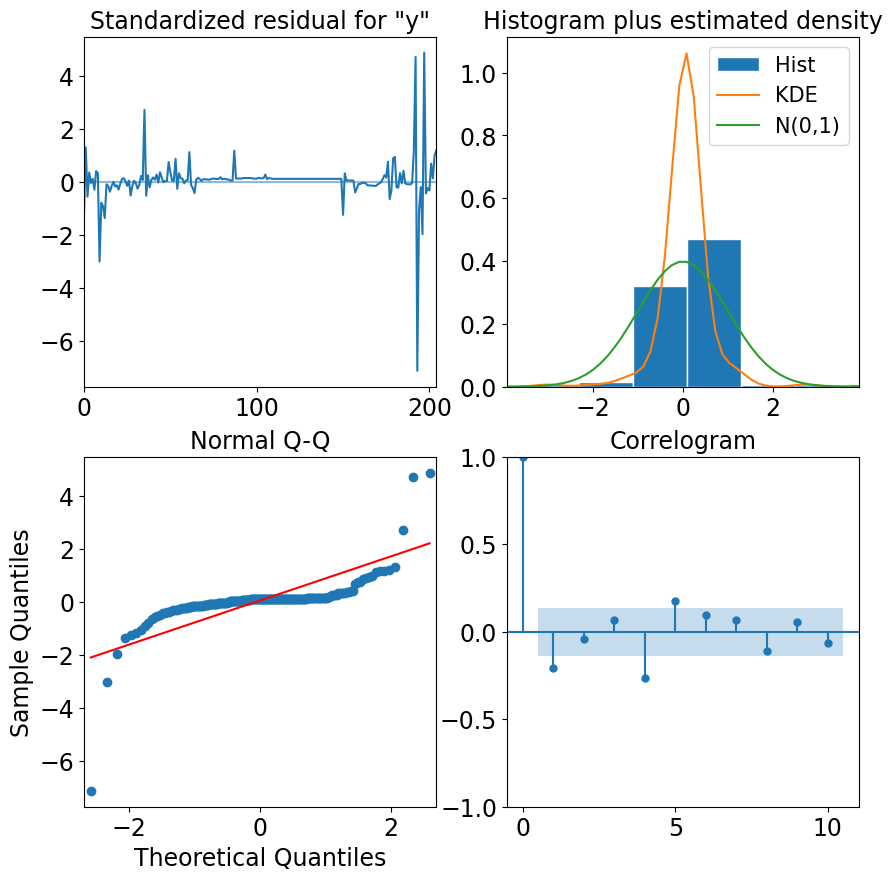

In [54]:
fig = fitted_model.plot_diagnostics(figsize=(10, 10))  # Initial: 8,7
plt.savefig(os.path.join(DATA_PATH, 'model-diagnostics.pdf'), format='pdf')
plt.show()